In [91]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)


[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})
from scipy.stats import uniform
from scipy import stats


file_path = file_path = r"C:\Users\Martinz_Toyota\Downloads\archive (1)\nyc-rolling-sales.csv"
df_can = pd.read_csv(file_path) 

df_can.head()


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [93]:
print(df_can.shape)

(84548, 22)


In [94]:
print('data dimensions:', df_can.shape)

data dimensions: (84548, 22)


In [95]:
print(df_can.columns)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')


In [96]:
#apakah ada perbedaan harga antara property yang dibangun ditahun 1900 - 2000 dengan yang dibangun setelah 2001
df_can_1900_2000.loc[:, 'SALE PRICE'] = pd.to_numeric(df_can_1900_2000['SALE PRICE'], errors='coerce')
df_can_post_2001.loc[:, 'SALE PRICE'] = pd.to_numeric(df_can_post_2001['SALE PRICE'], errors='coerce')

df_can_1900_2000_clean = df_can_1900_2000.dropna(subset=['SALE PRICE'])
df_can_post_2001_clean = df_can_post_2001.dropna(subset=['SALE PRICE'])

avg_price_1900_2000 = df_can_1900_2000_clean['SALE PRICE'].mean()
avg_price_post_2001 = df_can_post_2001_clean['SALE PRICE'].mean()

print("Average sale price for properties built between 1900 and 2000:", avg_price_1900_2000)
print("Average sale price for properties built after 2001:", avg_price_post_2001)


Average sale price for properties built between 1900 and 2000: 1183630.8384386322
Average sale price for properties built after 2001: 1730657.9968100432


In [97]:
t_stat, p_value = stats.ttest_ind(df_can_1900_2000['SALE PRICE'].dropna(), df_can_post_2001['SALE PRICE'].dropna())

print("Nilai t:", t_stat)
print("Nilai p:", p_value)

Nilai t: -4.180762007598176
Nilai p: 2.9092928640002097e-05


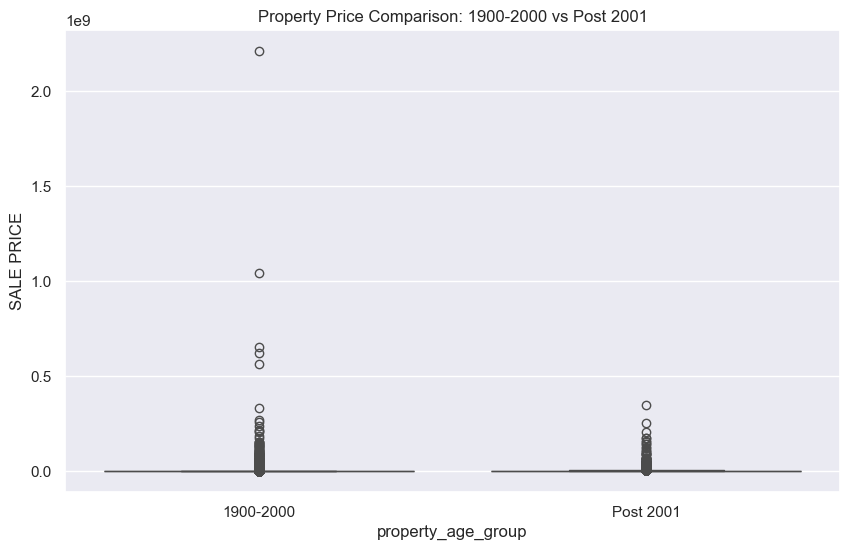

In [98]:

df_can['YEAR BUILT'] = pd.to_numeric(df_can['YEAR BUILT'], errors='coerce')
df_can['SALE PRICE'] = pd.to_numeric(df_can['SALE PRICE'], errors='coerce')

df_can['property_age_group'] = df_can['YEAR BUILT'].apply(lambda x: '1900-2000' if 1900 <= x <= 2000 else 'Post 2001')

plt.figure(figsize=(10, 6))
sns.boxplot(x='property_age_group', y='SALE PRICE', data=df_can)

plt.title('Property Price Comparison: 1900-2000 vs Post 2001')
plt.xlabel('property_age_group')
plt.ylabel('SALE PRICE')

plt.show()


In [99]:
#apakah ada perbedaan unit yang terjual tergantung dari kategori gedung tersebut
print(df_can.columns)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'property_age_group'],
      dtype='object')


In [100]:
units_per_category = df_can.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].sum().reset_index()
print(units_per_category)

                         BUILDING CLASS CATEGORY  TOTAL UNITS
0    01 ONE FAMILY DWELLINGS                            18648
1    02 TWO FAMILY DWELLINGS                            32451
2    03 THREE FAMILY DWELLINGS                          13137
3    04 TAX CLASS 1 CONDOS                               1630
4    05 TAX CLASS 1 VACANT LAND                           245
5    06 TAX CLASS 1 - OTHER                                30
6    07 RENTALS - WALKUP APARTMENTS                     39989
7    08 RENTALS - ELEVATOR APARTMENTS                   31179
8    09 COOPS - WALKUP APARTMENTS                        1202
9    10 COOPS - ELEVATOR APARTMENTS                     12677
10   11 SPECIAL CONDO BILLING LOTS                          0
11  11A CONDO-RENTALS                                    2605
12   12 CONDOS - WALKUP APARTMENTS                        926
13   13 CONDOS - ELEVATOR APARTMENTS                    12483
14   14 RENTALS - 4-10 UNIT                              3587
15   15 

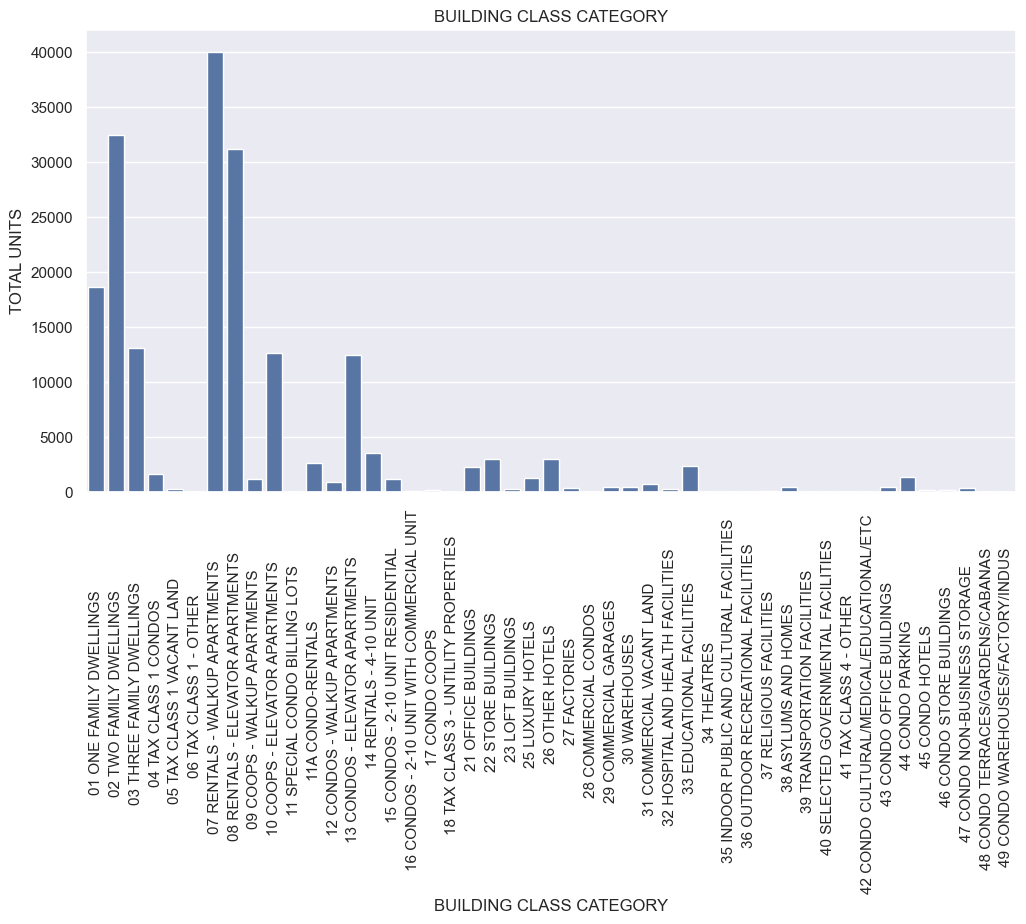

In [101]:
plt.figure(figsize=(12, 6))
sns.barplot(x='BUILDING CLASS CATEGORY', y='TOTAL UNITS', data=units_per_category)
plt.xticks(rotation=90)  
plt.title('BUILDING CLASS CATEGORY')
plt.xlabel('BUILDING CLASS CATEGORY')
plt.ylabel('TOTAL UNITS')
plt.show()

In [102]:
anova_result = stats.f_oneway(*[group['TOTAL UNITS'].values for name, group in df_can.groupby('BUILDING CLASS CATEGORY')])

print("Nilai F:", anova_result.statistic)
print("Nilai p:", anova_result.pvalue)

Nilai F: 219.399308185666
Nilai p: 0.0


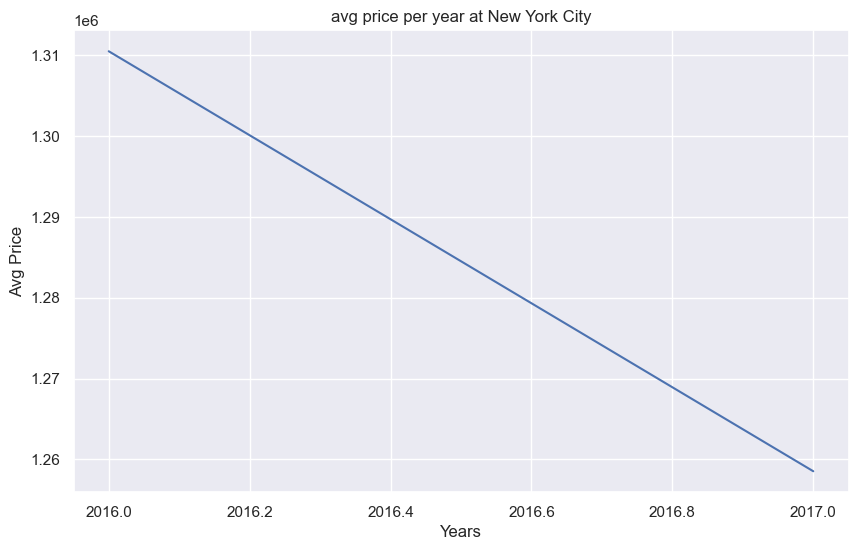

In [103]:
#apakah ada trend tertentu di new york city real estate?
df_can['SALE DATE'] = pd.to_datetime(df_can['SALE DATE'])
df_can['YEAR BUILT'] = df_can['SALE DATE'].dt.year
avg_price_per_year = df_can.groupby('YEAR BUILT')['SALE PRICE'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR BUILT', y='SALE PRICE', data=avg_price_per_year)
plt.title('avg price per year at New York City')
plt.xlabel('Years')
plt.ylabel('Avg Price')
plt.show()

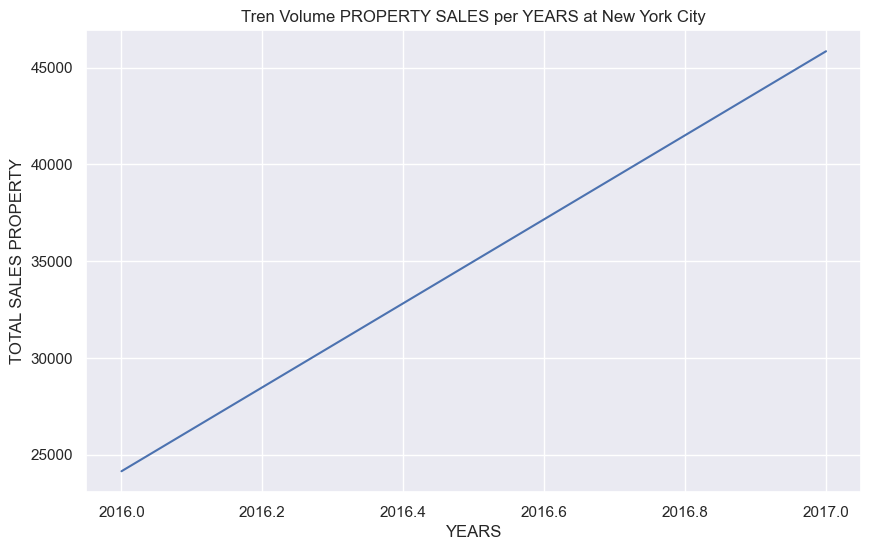

In [104]:
#volume penjualan
sales_per_year = df_can.groupby('YEAR BUILT')['SALE PRICE'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR BUILT', y='SALE PRICE', data=sales_per_year)
plt.title('Tren Volume PROPERTY SALES per YEARS at New York City')
plt.xlabel('YEARS')
plt.ylabel('TOTAL SALES PROPERTY')
plt.show()

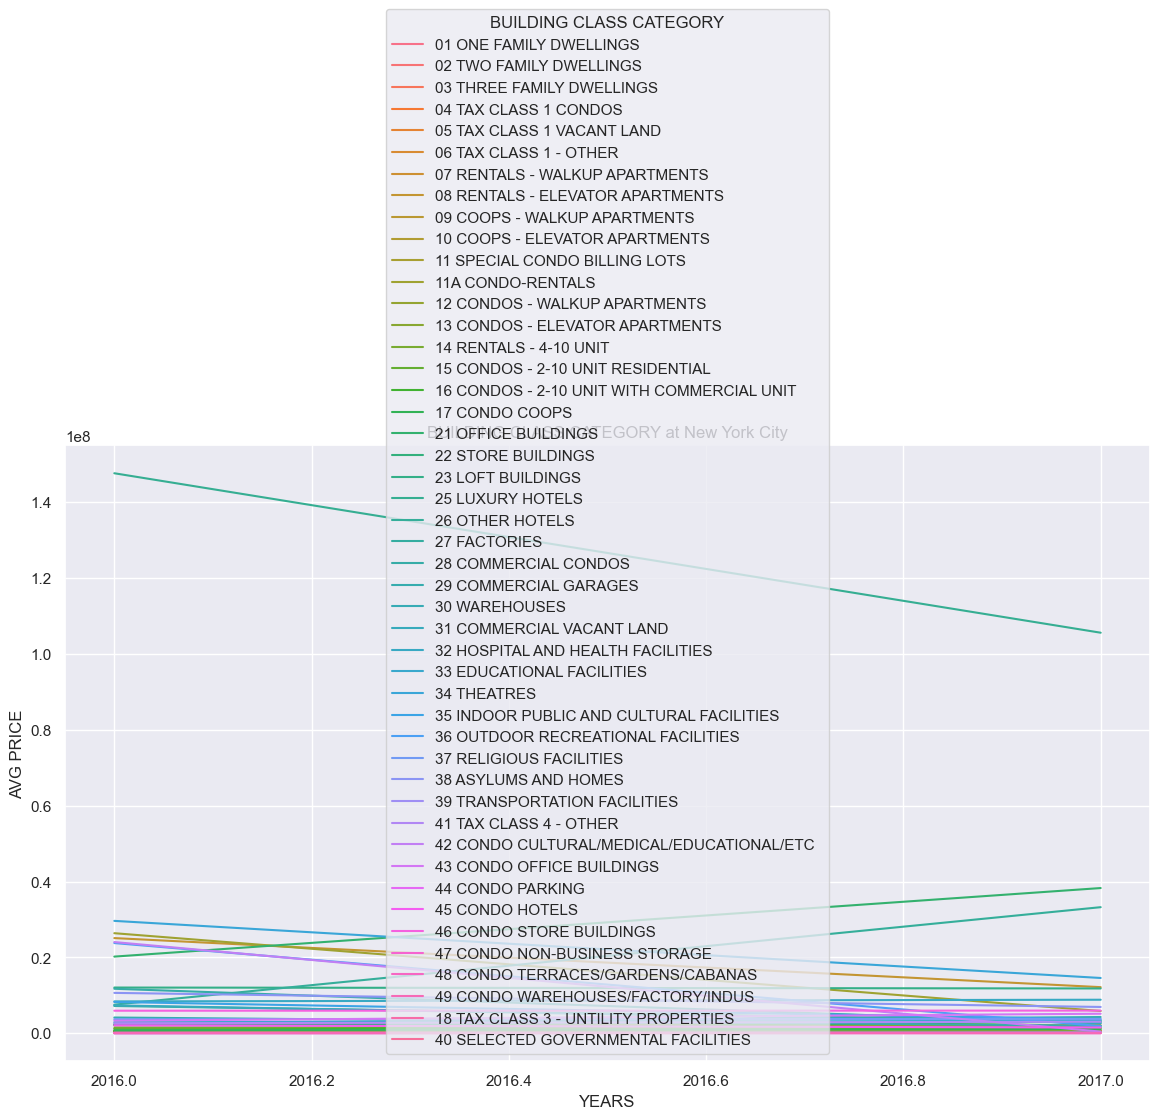

In [105]:
#Berdasarkan kategori gedung
avg_price_by_category = df_can.groupby(['YEAR BUILT', 'BUILDING CLASS CATEGORY'])['SALE PRICE'].mean().reset_index()


plt.figure(figsize=(14, 8))
sns.lineplot(x='YEAR BUILT', y='SALE PRICE', hue='BUILDING CLASS CATEGORY', data=avg_price_by_category)
plt.title('BUILDING CLASS CATEGORY at New York City')
plt.xlabel('YEARS')
plt.ylabel('AVG PRICE')
plt.show()


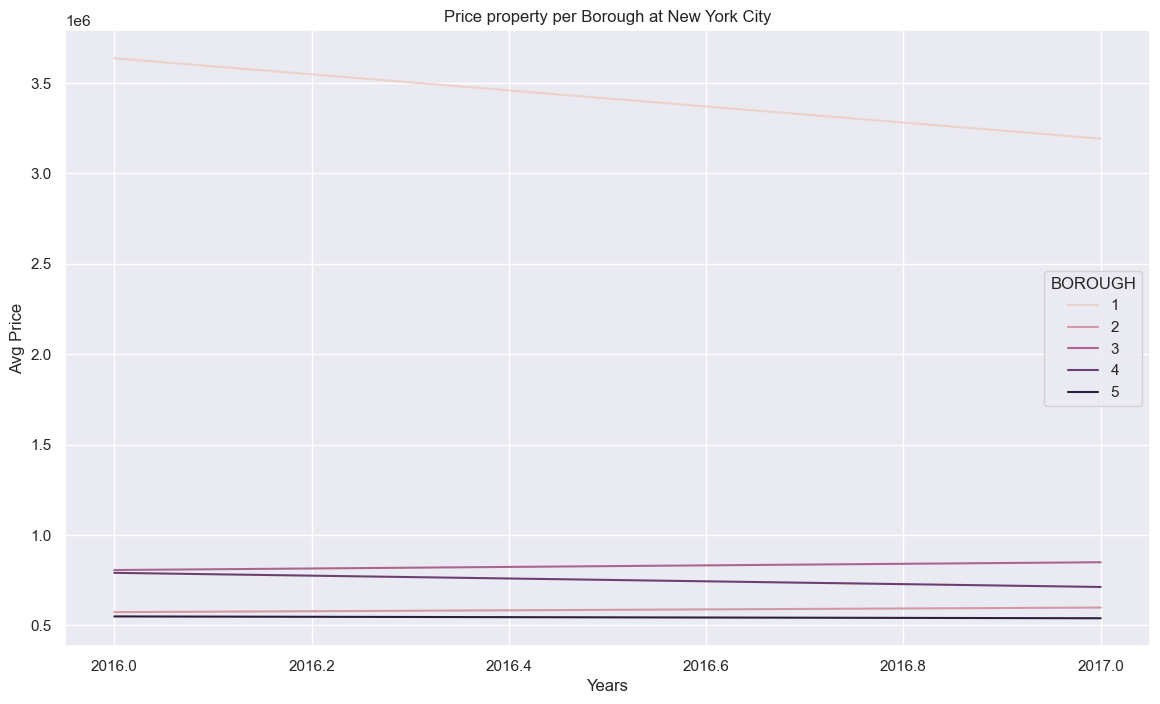

In [106]:
#harga rata-rata serta volume penjualan per borough
avg_price_by_borough = df_can.groupby(['YEAR BUILT', 'BOROUGH'])['SALE PRICE'].mean().reset_index()


plt.figure(figsize=(14, 8))
sns.lineplot(x='YEAR BUILT', y='SALE PRICE', hue='BOROUGH', data=avg_price_by_borough)
plt.title('Price property per Borough at New York City')
plt.xlabel('Years')
plt.ylabel('Avg Price')
plt.show()


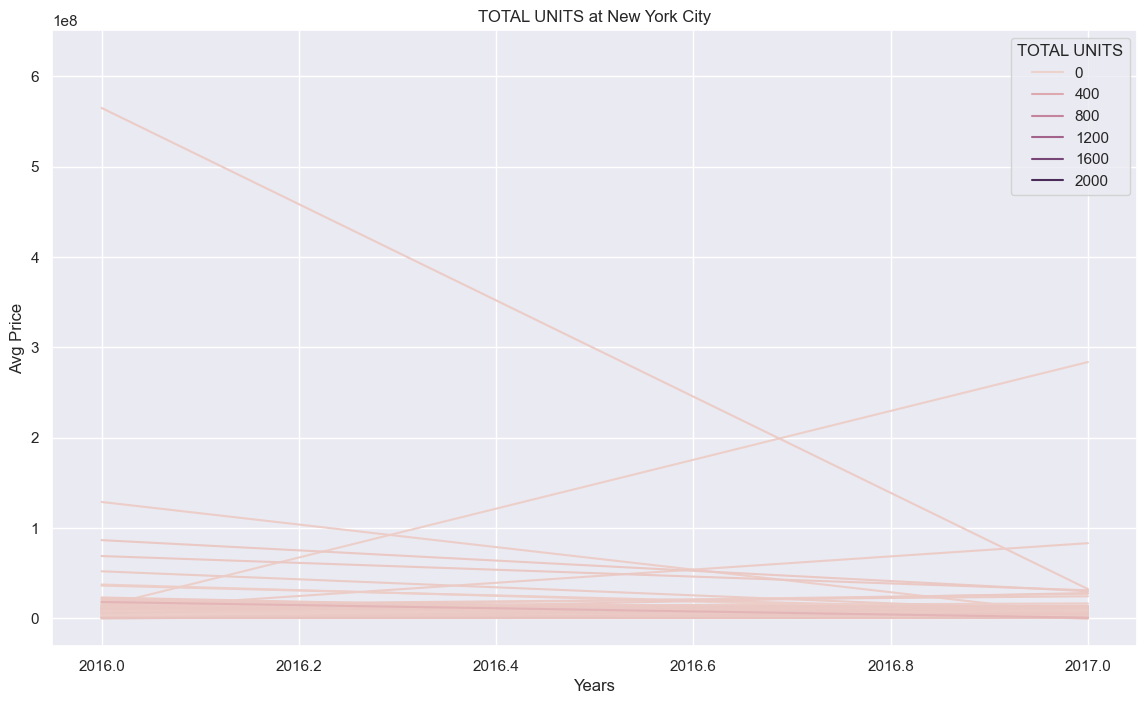

In [107]:
#data berdasarkan jenis properti
avg_price_by_property_type = df_can.groupby(['YEAR BUILT', 'TOTAL UNITS'])['SALE PRICE'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(x='YEAR BUILT', y='SALE PRICE', hue='TOTAL UNITS', data=avg_price_by_property_type)
plt.title('TOTAL UNITS at New York City')
plt.xlabel('Years')
plt.ylabel('Avg Price')
plt.show()

In [108]:
#berdasarkan yang lebih laku
sales_by_category = df_can.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].count().reset_index()
sales_by_category = sales_by_category.sort_values(by='SALE PRICE', ascending=False)

print(sales_by_category)


                         BUILDING CLASS CATEGORY  SALE PRICE
0    01 ONE FAMILY DWELLINGS                           14461
1    02 TWO FAMILY DWELLINGS                           13091
9    10 COOPS - ELEVATOR APARTMENTS                    11853
13   13 CONDOS - ELEVATOR APARTMENTS                   10927
2    03 THREE FAMILY DWELLINGS                          3665
6    07 RENTALS - WALKUP APARTMENTS                     2784
8    09 COOPS - WALKUP APARTMENTS                       2570
3    04 TAX CLASS 1 CONDOS                              1456
15   15 CONDOS - 2-10 UNIT RESIDENTIAL                  1212
17   17 CONDO COOPS                                     1114
41   44 CONDO PARKING                                    885
4    05 TAX CLASS 1 VACANT LAND                          793
12   12 CONDOS - WALKUP APARTMENTS                       748
20   22 STORE BUILDINGS                                  725
14   14 RENTALS - 4-10 UNIT                              555
26   29 COMMERCIAL GARAG

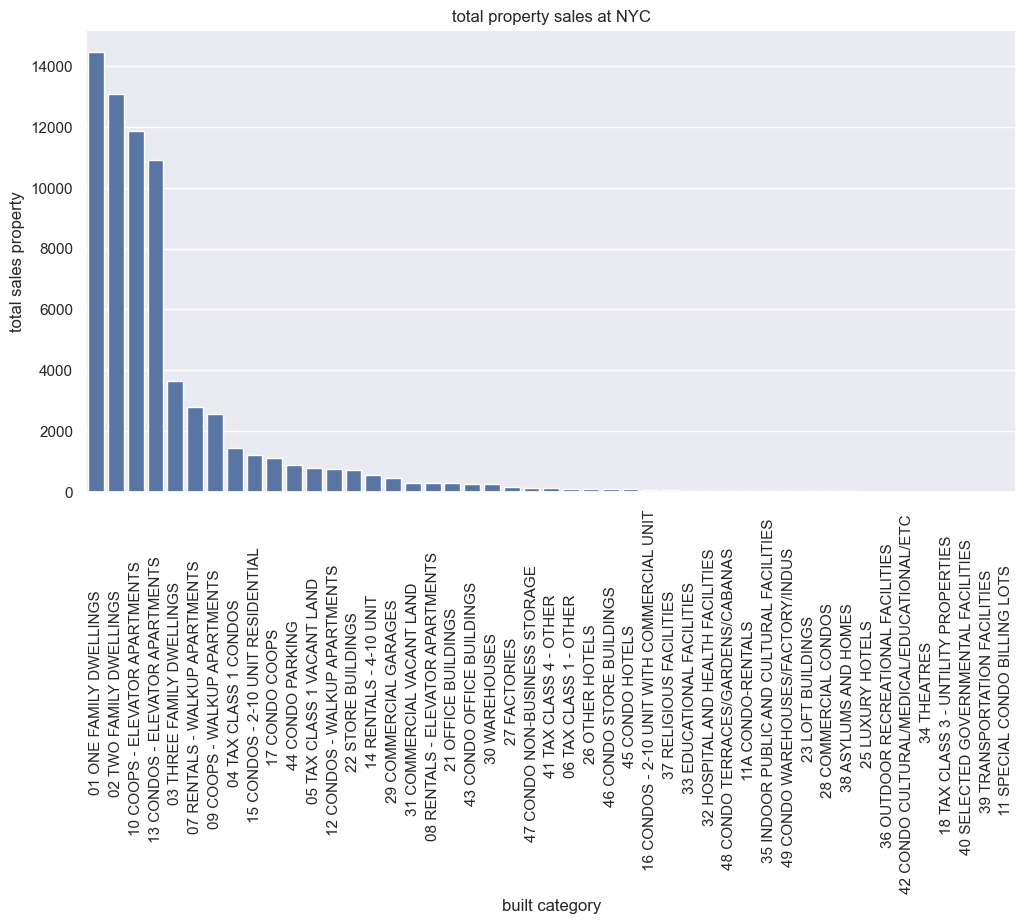

In [109]:
#gambaran visual mengenai kategori gedung yang lebih laku
plt.figure(figsize=(12, 6))
sns.barplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=sales_by_category)

plt.xticks(rotation=90)

plt.title('total property sales at NYC')
plt.xlabel('built category')
plt.ylabel('total sales property')

plt.show()

In [110]:
#apakah ada penjualan naik/turun
print(df_can.columns)



Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'property_age_group'],
      dtype='object')


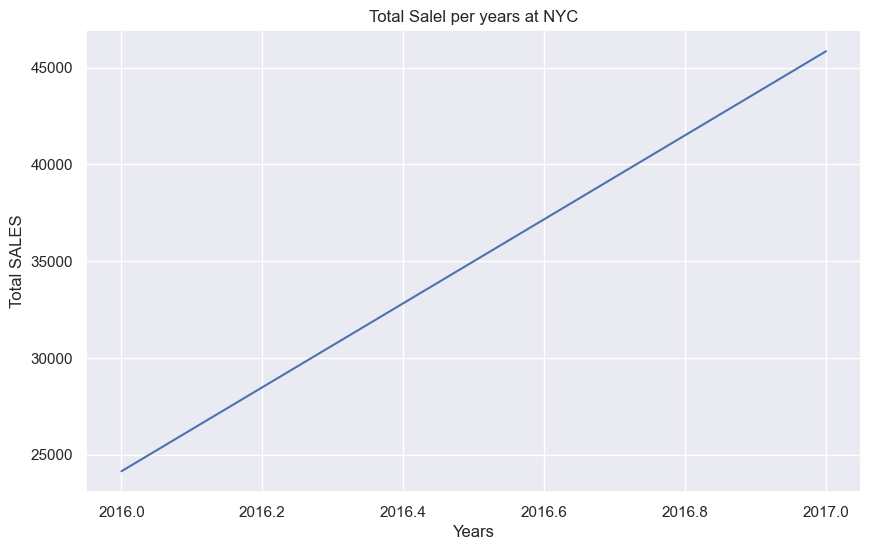

In [111]:
df_can['SALE DATE'] = pd.to_datetime(df_can['SALE DATE'])
df_can['YEAR BUILT'] = df_can['SALE DATE'].dt.year
sales_per_year = df_can.groupby('YEAR BUILT')['SALE PRICE'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR BUILT', y='SALE PRICE', data=sales_per_year)
plt.title('Total Salel per years at NYC')
plt.xlabel('Years')
plt.ylabel('Total SALES')
plt.show()

In [112]:
#persentase perubahan dari tahun ke tahun
sales_per_year['percent_change'] = sales_per_year['SALE PRICE'].pct_change() * 100
print(sales_per_year)

   YEAR BUILT  SALE PRICE  percent_change
0        2016       24141             NaN
1        2017       45846       89.909283


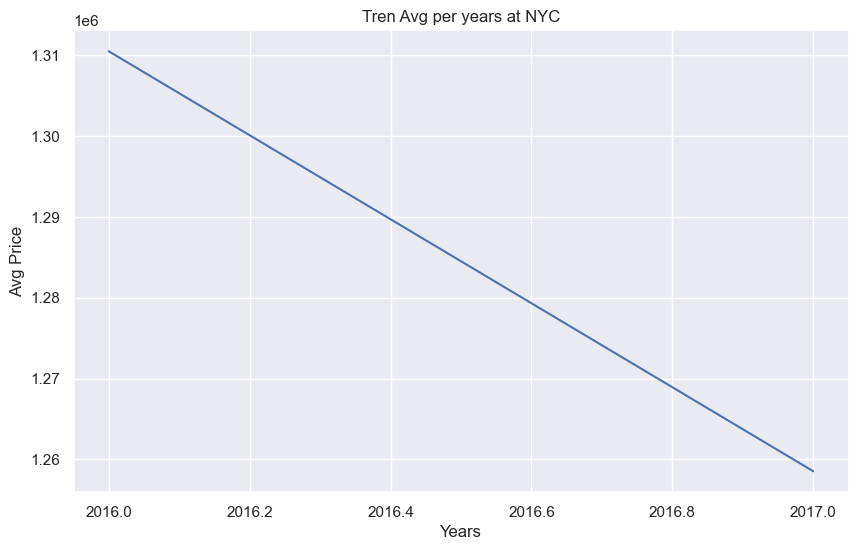

In [113]:
#Harga Rata-rata per Tahun
avg_price_per_year = df_can.groupby('YEAR BUILT')['SALE PRICE'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR BUILT', y='SALE PRICE', data=avg_price_per_year)
plt.title('Tren Avg per years at NYC')
plt.xlabel('Years')
plt.ylabel('Avg Price')
plt.show()

In [114]:
df_can.isna().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
property_age_group                    0
dtype: int64

In [115]:
print(df_can.head()) 

   Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD  

In [116]:
width = 8
height = 10
total_num_tiles = width * height
print('Total number of tiles is', total_num_tiles)

Total number of tiles is 80


In [117]:
print(df_can.columns)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'property_age_group'],
      dtype='object')


In [118]:
import requests
import pandas as pd
import folium
def get_coordinates(address):
    API_KEY = 'YOUR_GOOGLE_API_KEY'  # Ganti dengan API Key Anda
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    params = {'address': address, 'key': API_KEY}
    response = requests.get(base_url, params=params)
    data = response.json()
    if data['status'] == 'OK':
        lat = data['results'][0]['geometry']['location']['lat']
        lon = data['results'][0]['geometry']['location']['lng']
        return lat, lon
    else:
        return None, None

In [119]:
#berdasarkan alamat
data = {
    'BLOCK': [1001, 1002, 1003],
    'LOT': [200, 201, 202],
    'EASE_MENT': ['None', 'None', 'Yes'],
    'BUILDING_CLASS_AT_PRESENT': ['Residential', 'Commercial', 'Residential'],
    'ADDRESS': ['123 Main St, New York, NY 10001', '456 Oak St, New York, NY 10002', '789 Pine St, New York, NY 10003'],
    'APARTMENT_NUMBER': [None, None, 5],
    'ZIP_CODE': [10001, 10002, 10003],
    'borough': [1, 2, 3]  # Adjusted to 3 elements
}

df = pd.DataFrame(data)
print(df)

   BLOCK  LOT EASE_MENT BUILDING_CLASS_AT_PRESENT  \
0   1001  200      None               Residential   
1   1002  201      None                Commercial   
2   1003  202       Yes               Residential   

                           ADDRESS  APARTMENT_NUMBER  ZIP_CODE  borough  
0  123 Main St, New York, NY 10001               NaN     10001        1  
1   456 Oak St, New York, NY 10002               NaN     10002        2  
2  789 Pine St, New York, NY 10003               5.0     10003        3  


In [120]:
import requests
import pandas as pd
import folium

def get_coordinates(address):
    API_KEY = 'YOUR_GOOGLE_API_KEY'  # Ganti dengan API Key Anda
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    params = {'address': address, 'key': API_KEY}
    response = requests.get(base_url, params=params)
    data = response.json()
    if data['status'] == 'OK':
        lat = data['results'][0]['geometry']['location']['lat']
        lon = data['results'][0]['geometry']['location']['lng']
        return lat, lon
    else:
        return None, None

# Misalkan kita memiliki dataset yang memuat kolom 'ADDRESS', 'BLOCK', 'LOT', dsb.
data = {
    'BLOCK': [1001, 1002, 1003],
    'LOT': [200, 201, 202],
    'EASE_MENT': ['None', 'None', 'Yes'],
    'BUILDING_CLASS_AT_PRESENT': ['Residential', 'Commercial', 'Residential'],
    'ADDRESS': ['123 Main St, New York, NY 10001', '456 Oak St, New York, NY 10002', '789 Pine St, New York, NY 10003'],
    'APARTMENT_NUMBER': [None, None, 5],
    'ZIP_CODE': [10001, 10002, 10003],
}

df = pd.DataFrame(data)
df['latitude'], df['longitude'] = zip(*df['ADDRESS'].apply(get_coordinates))

print(df)

   BLOCK  LOT EASE_MENT BUILDING_CLASS_AT_PRESENT  \
0   1001  200      None               Residential   
1   1002  201      None                Commercial   
2   1003  202       Yes               Residential   

                           ADDRESS  APARTMENT_NUMBER  ZIP_CODE latitude  \
0  123 Main St, New York, NY 10001               NaN     10001     None   
1   456 Oak St, New York, NY 10002               NaN     10002     None   
2  789 Pine St, New York, NY 10003               5.0     10003     None   

  longitude  
0      None  
1      None  
2      None  
